In [105]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve

In [106]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_flagged.csv")
pd.set_option('max_columns', 150)

In [107]:
ds.drop(columns="Unnamed: 0",inplace=True)

In [101]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will try to see if we can improve our results by grouping English speaking capitalist countries (US GB AU NL)

In [102]:
eng_cap= ["US","GB","AU","NZ"]

In [103]:
ds["cap_other"]=np.where(ds.country.isin(eng_cap),0,1)

In [108]:
ds.head(5)
ds1 = ds.copy()

In [89]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [90]:
ds.drop(columns="country",axis=1,inplace=True)

In [91]:
features = ds[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds[['age','accuracy']]=features_std

In [92]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Let's first define a train test set and then resample the training set to avoid imbalance

In [209]:

X = ds.drop(columns="cap_other",axis=1)
y = ds.cap_other

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state=67)
#I deciding to keep 5% of the data for testing, since it is already about 2 500 rows

In [151]:
#now lets adress imbalance with Smote

In [211]:
sm = SMOTE(random_state=67)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

0    35943
1    15370
Name: cap_other, dtype: int64 [35943 35943]


Random Forest Classifier

In [212]:
model = RandomForestClassifier()
model.fit(x_train_res , y_train_res)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.6747720364741642 precision: 0.42857142857142855 recall: 0.1547911547911548 F1: 0.22743682310469315


In [214]:
cm

array([[825,  84],
       [344,  63]], dtype=int64)

Recall is really bad, maybe there is an issue with the sampling
Lets try both downsample and upsample

In [35]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [36]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [37]:
X_test = test.drop(columns="cap_other",axis=1)
y_test = test.cap_other

In [38]:
train.cap_other.value_counts()

0    35968
1    15372
Name: cap_other, dtype: int64

In [39]:
from sklearn.utils import resample

ds_majority=train.loc[ds.cap_other == 0]
ds_minority = train.loc[ds.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15388,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


0    15388
1    15372
Name: cap_other, dtype: int64


In [40]:

X_train = ds_train.drop(columns="cap_other",axis=1)
y_train = ds_train.cap_other

In [41]:
X_train.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
37278,5,4,5,3,2,3,4,2,4,4,3,3,2,4,5,5,5,2,2,5,1,3,-0.82503,1,-0.218785,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5919317300232738 precision: 0.37924151696606784 recall: 0.4691358024691358 F1: 0.41942604856512145


In [44]:
cm

array([[573, 311],
       [215, 190]], dtype=int64)

In [45]:
len(X_train) 

30760

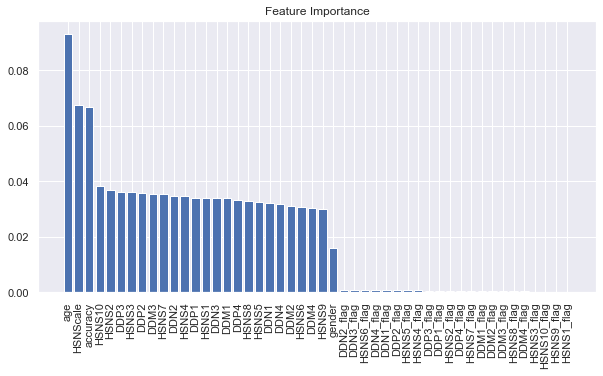

In [46]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

X = ds.drop(columns="cap_other",axis=1)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize = (10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
#The age feature should not be relevant here, lets try the same model after removing the age feature

In [48]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [49]:
X_test = test.drop(columns=["cap_other","age"],axis=1)
y_test = test.cap_other

In [50]:
train.cap_other.value_counts()

0    35872
1    15364
Name: cap_other, dtype: int64

In [51]:
from sklearn.utils import resample

ds_majority=train.loc[ds.cap_other == 0]
ds_minority = train.loc[ds.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15364,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


1    15364
0    15364
Name: cap_other, dtype: int64


In [52]:

X_train = ds_train.drop(columns=["cap_other","age"],axis=1)
y_train = ds_train.cap_other

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy: 0.5685570710696339 precision: 0.32971014492753625 recall: 0.4406779661016949 F1: 0.37720207253886007


In [54]:
cm

array([[610, 370],
       [231, 182]], dtype=int64)

let's do the same with upsampling before trying another model

In [55]:
ds.cap_other.value_counts()

0    36852
1    15777
Name: cap_other, dtype: int64

In [56]:
msk = np.random.rand(len(ds)) < 0.975

train = ds[msk]

test = ds[~msk]

In [57]:
train.shape

(51276, 49)

In [58]:
test.shape

(1353, 49)

In [59]:

#X_train = train.drop(columns="cap_other",axis=1)
#y_train = train.cap_other

In [60]:
X_test = test.drop(columns=["cap_other","age"],axis=1)
y_test = test.cap_other

In [61]:
test.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
27,4,4,4,2,2,4,4,2,4,1,2,1,2,5,5,4,4,2,4,4,2,3,-0.82503,1,-0.343134,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
train.cap_other.value_counts()

0    35908
1    15368
Name: cap_other, dtype: int64

In [63]:

ds_majority=train.loc[train.cap_other == 0]
ds_minority = train.loc[train.cap_other == 1]

ds_minority_upsampled = resample(ds_minority, 
                                 replace=True,     
                                 n_samples=35908,    
                                 random_state=67) 
ds_train = pd.concat([ds_minority_upsampled, ds_majority])


In [64]:
print (ds_train.cap_other.value_counts())

1    35908
0    35908
Name: cap_other, dtype: int64


In [65]:

X_train = ds_train.drop(columns=["cap_other","age"],axis=1)
y_train = ds_train.cap_other

In [66]:
ds_train.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,cap_other
38305,5,5,4,1,5,5,5,1,5,1,1,5,1,4,5,5,4,4,1,5,1,3,-0.917956,1,0.713834,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.6674057649667405 precision: 0.36942675159235666 recall: 0.14180929095354522 F1: 0.20494699646643105


In [69]:
cm

array([[845,  99],
       [351,  58]], dtype=int64)

Let's see if we can optimize the parameters for this model before trying another one.

In [241]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [245]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=67, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.0min


In [ ]:
rf_random.best_params_

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train_res, y = y_train_res, 
                                param_name = 'n_estimators', 
                                param_range = n_estimators, cv = 3)

Now lets try with KNN model

In [17]:
k_range=range(3,23)
scores=[]

In [25]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

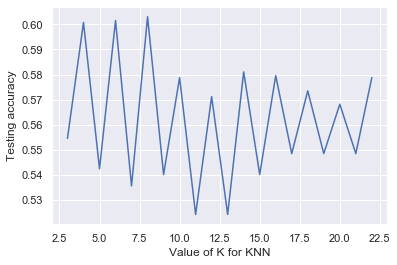

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")

In [27]:
print(scores)

[0.5545454545454546, 0.6007575757575757, 0.5424242424242425, 0.6015151515151516, 0.5356060606060606, 0.603030303030303, 0.5401515151515152, 0.5787878787878787, 0.5242424242424243, 0.5712121212121212, 0.5242424242424243, 0.581060606060606, 0.5401515151515152, 0.5795454545454546, 0.5484848484848485, 0.5734848484848485, 0.5484848484848485, 0.5681818181818182, 0.5484848484848485, 0.5787878787878787]


In [70]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [71]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5927568366592757 precision: 0.34292035398230086 recall: 0.37897310513447435 F1: 0.36004645760743326


In [72]:
cm

array([[647, 297],
       [254, 155]], dtype=int64)

Last try taking into account the results of the dozen triad test

In [109]:
ds1["DDPScale"]= round(ds.iloc[:,10:14].sum(axis=1)*5/100,2)

In [110]:
ds1["DDNScale"]= round(ds.iloc[:,14:18].sum(axis=1)*5/100,2)

In [111]:
ds1["DDMScale"]= round(ds.iloc[:,18:22].sum(axis=1)*5/100,2)

In [112]:
ds.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
ds1.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.25,0.3


In [114]:
#ds1.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_full.csv")

lets try again classifier models with thoses addes features

In [143]:
features = ds1[['age','accuracy']]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

ds1[['age','accuracy']]=features_std

In [144]:
eng_cap= ["US","GB","AU","NZ"]

ds1["cap_other"]=np.where(ds1.country.isin(eng_cap),0,1)

In [146]:
ds1.head(1)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag,DDPScale,DDNScale,DDMScale,cap_other
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,1.03349,2,0.900357,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.25,0.3,1


In [147]:

X = ds1.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y = ds1.cap_other

In [148]:
msk = np.random.rand(len(ds1)) < 0.975

train = ds1[msk]

test = ds1[~msk]

In [149]:
X_test = test.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y_test = test.cap_other

In [150]:
train.cap_other.value_counts()

0    35949
1    15369
Name: cap_other, dtype: int64

In [151]:
from sklearn.utils import resample

ds_majority=train.loc[ds1.cap_other == 0]
ds_minority = train.loc[ds1.cap_other == 1]

ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     
                                 n_samples=15388,    
                                 random_state=67) 
ds_train = pd.concat([ds_majority_downsampled, ds_minority])


# Display new class counts
print (ds_train.cap_other.value_counts())


0    15388
1    15369
Name: cap_other, dtype: int64


In [152]:

X_train = ds_train.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
y_train = ds_train.cap_other

In [153]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5758962623951183 precision: 0.34959349593495936 recall: 0.4215686274509804 F1: 0.3822222222222222


In [157]:
cm

array([[583, 320],
       [236, 172]], dtype=int64)

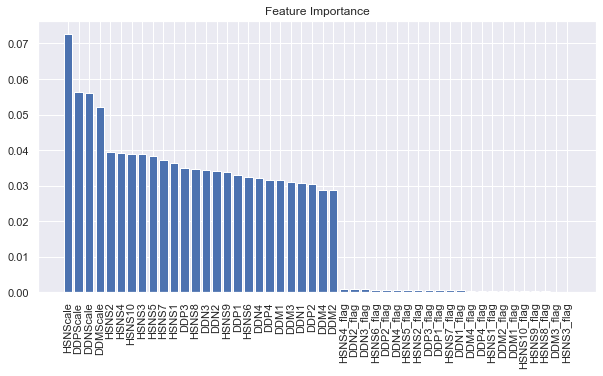

In [156]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

X = ds1.drop(columns=["cap_other","country","age","accuracy","gender"],axis=1)
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize = (10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()